# Coordinate Transformation
*This notebook introduces the configuration space.*
* Configuration Space (C-Space): The n-dimensional space containing all possible configurations of the robot.




## Table of Contents

* [1. Key Physical Parameters](#01)
* [2. Represnetation Convention](#02)
* [3. Coordinate Transformation](#03)
    * [3.1 Rigid-Body in the Plane](#031)
    * [3.2 2D Transformation](#032)
    


## Key Physical Parameters <a class="anchor" id="01"></a>
* Position (Location)
* Attitude (Orientation)
* Velocity (Linear and Angular)
* Acceleration (Linear and Angular)
* Force

![key_physical](img/03-Coordinate_transformation/key_physical_parameters.png)





## Representation Convention <a class="anchor" id="02"></a>

* A free vector is a geometric quantity with a length and a direction. 
    * It is called “free” because it is not necessarily rooted anywhere; only its length and direction matter. 
* One stationary fixed frame (or space frame) {s} is defined.
* Body frame {b} is the stationary frame that is coincident with the body-attached frame at any instant.
* All reference frames are right-handed.

![right_handed](img/03-Coordinate_transformation/right_handed.png)
(Left) The x̂, ŷ, and ẑ axes of a right-handed reference frame are aligned
with the index finger, middle finger, and thumb of the right hand, respectively. (Right)
A positive rotation about an axis is in the direction in which the fingers of the right
hand curl when the thumb is pointed along the axis.


## Coordinate Transformation <a class="anchor" id="03"></a>

In almost all fields of science and engineering, it is essential to identify and manipulate mathematical representations of physical, real-world quantities. Robotics is no exception. Intelligent robots build a "mental model" of themselves and the world as they perceive their environments, and they modify those models when interpreting the past and predicting the future. In an abstract sense, these models are simply a collection of numbers and labels, with no explicit meaning to the robot. It is the job of a robot engineer to correctly associate numbers with meaning, and correspondingly, meanings with numbers.

Two of the most important mathematical representations are vectors and matrices from linear algebra. Vectors are often representations of positions or directions in two or three dimensions of space, but can also represent other quantities like sensor measurements. Matrices are representations of how representations change, either through an action, or even through a change in how those numbers are interpreted. We will be using them liberally throughout the book, and they appear in almost every subject of robotics. Hence, they must be mastered to get anywhere beyond a superficial understanding of the material.

### Rigid-Body in the Plane <a class="anchor" id="031"></a>
The body frame {b} is expressed in the fixed-frame coordinates {s} by the
vector p and the directions of the unit axes x̂b and ŷb . {s}: fixed reference frame
Unit vectors are with hat notations
![rigid_body_1](img/03-Coordinate_transformation/rigid_body_in_the_plane1.png)

The orientation of {b} relative to {s} is:
![rigid_body_2](img/03-Coordinate_transformation/rigid_body_in_plane_2.png)

The matrix P is an example of a rotation matrix. Together, the pair (P, p)
provides a description of the orientation and position of {b} relative to {s}. The rotation-matrix vector pair (P,p) can be used to:
* represent a configuration of a rigid body
* change the reference frame in which a vector or frame is represented
* displace a vector or a frame (rigid-body motion)

The frame {b} in {s} is given by (P, p), and the frame {c} in {b} is given
by (Q, q). From these we can derive the frame {c} in {s}, described by (R, r).
![rotation_matrix_3](img/03-Coordinate_transformation/rotation_matrix_3.png)

Rigid Body Motion Relative to {s}
* The frame {d} is initially coincident with {s}, and {c} is initially described by {R, r} in {s} (or {d}).
* The body is moved in such a way that {d} moves to {d’}, becoming coincident with a frame {b} described by (P, p) in {s}.
* (P, p) is expressed in the same frame as (R, r)

![rigid_body_motion_relative_to_S](img/03-Coordinate_transformation/rigid_body_motion_relative_to_S.png)


### 2D Transformation <a class="anchor" id="031"></a>
The first and second columns of the transform matrix specify the coordinates of the X and Y axes of the new coordinate frame. The thrid column is the origin of the new coordiante frame with repsect to the the previous frame. So in the transform, the new X axis pointing in direction  (cosθ, sinθ), and the new origin is at location (Px, Py). The upperleft 2x2 matrix is the rotation matrix and the 2x1 third column vector is the translation. It is important to remember that translation is done first, then rotation when using a transform like this that embeds both rotation and translation by

$$T_B=\begin{bmatrix} cos(\theta) & -sin(\theta) & P_x \\
                     sin(\theta) & cos(\theta) & P_y \\
                     0 & 0 & 1
     \end{bmatrix}$$

#### Transformation Matrix
*$T({\displaystyle \mathbf {x} })=A{\displaystyle \mathbf {x} }$*
* $T$ is a linear transformation ${\displaystyle \mathbb {R} ^{n}}$ to ${\displaystyle \mathbb {R} ^{m}}$
* ${\displaystyle \mathbf {x} }$ is a column vector with ${\displaystyle n}$ entries
* ${\displaystyle A}$ is ${\displaystyle m\times n}$, and ${\displaystyle m\times n}$ has ${\displaystyle m}$ rows and ${\displaystyle n}$ columns, 
* 
for some {\displaystyle m\times n}m\times n matrix {\displaystyle A}A, called the transformation matrix of {\displaystyle T}T[citation needed]. Note that {\displaystyle A}A has {\displaystyle m}m rows and {\displaystyle n}n columns, 
and {\displaystyle \mathbf {x} }\mathbf {x}  is a column vector with {\displaystyle n}n entries, then

Please use the [link](https://ncase.me/matrix/) to try the 2D transformation.

### Examples for 2D coordiante transformation
The following exampels are used to demostrate 2D coordiante transformation.

### The examples of translation
The image of a bird is placed at (619,434), add 10 in x-axis. The bird will be placed at (629,434)


<IPython.core.display.Javascript object>


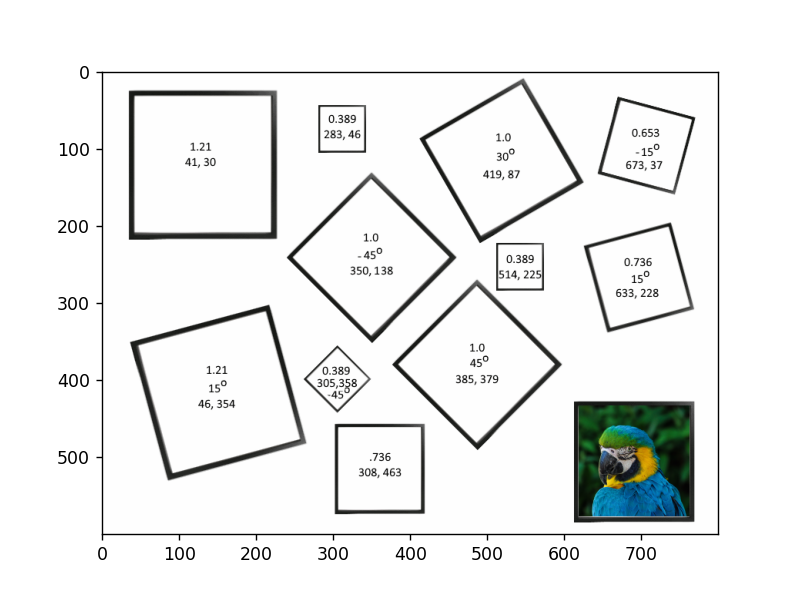

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib notebook

def compose(frame, image, transformation):
    
    width, height = frame.size
    
    #Invert matrix for compose function, grab values for Affine Transform
    t = np.linalg.inv(transformation)
    a=t[0,0]; b=t[0,1]; c=t[0,2]; d=t[1,0]; e=t[1,1]; f=t[1,2]
    
    image = image.transform((width,height), Image.AFFINE,(a,b,c,d,e,f), Image.BICUBIC)

    #Make mask from image's location
    im = np.sum(np.asarray(image), -1)
    vals = 255.0*( im > 0)
    mask = Image.fromarray(vals).convert("1")

    #Composite images together
    result = Image.composite(image,frame,mask)

    return result


#Open the two images
filename = "./img/03-Coordinate_transformation/PictureFrameCollage.png"
frame = Image.open(filename).convert("RGB")

filename0 = "./img/03-Coordinate_transformation/Bird0.png"
im = Image.open(filename0).convert("RGB")
theta_in_angle = 0
theta = np.deg2rad(theta_in_angle)

px = 619
py = 433
scale = 1
#Define the transformation to the first picture frame
# transformation = np.matrix([[np.cos(theta), np.sin(theta), scale*px],[-np.sin(theta), np.cos(theta), scale*py], [0,0,1]])
transformation = np.matrix([[scale*np.cos(theta),scale*np.sin(theta), px],
                            [scale*-np.sin(theta), scale*np.cos(theta), py],
                            [0,0,1]])
# transformation = np.matrix([[1,0,619],[0,1,433],[0,0,1]])


#Compose the two images together
result = compose(frame, im, transformation)
    
#Show the result
plt.imshow(result)
plt.show()

#Uncomment this line if you want to save the image
#result.save("Output.png")

<IPython.core.display.Javascript object>


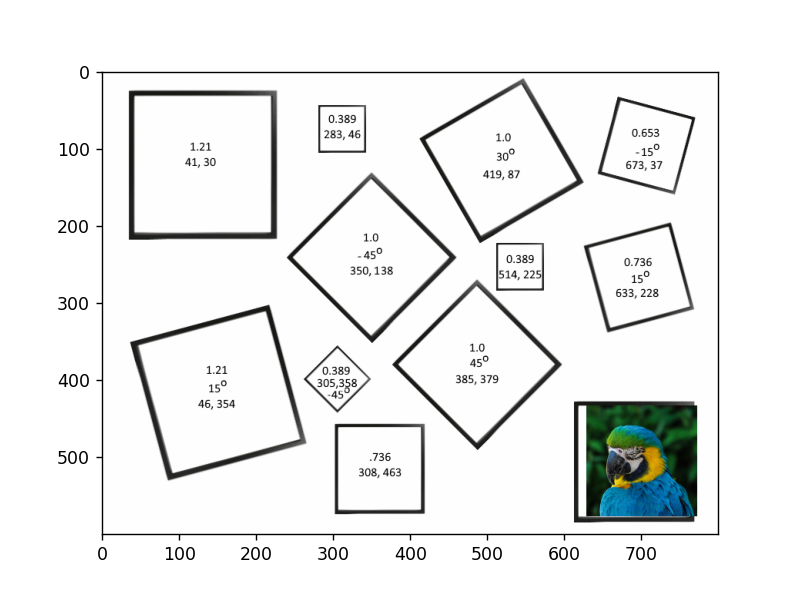

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib notebook

def compose(frame, image, transformation):
    
    width, height = frame.size
    
    #Invert matrix for compose function, grab values for Affine Transform
    t = np.linalg.inv(transformation)
    a=t[0,0]; b=t[0,1]; c=t[0,2]; d=t[1,0]; e=t[1,1]; f=t[1,2]
    
    image = image.transform((width,height), Image.AFFINE,(a,b,c,d,e,f), Image.BICUBIC)

    #Make mask from image's location
    im = np.sum(np.asarray(image), -1)
    vals = 255.0*( im > 0)
    mask = Image.fromarray(vals).convert("1")

    #Composite images together
    result = Image.composite(image,frame,mask)

    return result


#Open the two images
filename = "./img/03-Coordinate_transformation/PictureFrameCollage.png"
frame = Image.open(filename).convert("RGB")

filename0 = "./img/03-Coordinate_transformation/Bird0.png"
im = Image.open(filename0).convert("RGB")
theta_in_angle = 0
theta = np.deg2rad(theta_in_angle)

px = 619+10
py = 433
scale = 1
#Define the transformation to the first picture frame
# transformation = np.matrix([[np.cos(theta), np.sin(theta), scale*px],[-np.sin(theta), np.cos(theta), scale*py], [0,0,1]])
transformation = np.matrix([[scale*np.cos(theta),scale*np.sin(theta), px],
                            [scale*-np.sin(theta), scale*np.cos(theta), py],
                            [0,0,1]])
# transformation = np.matrix([[1,0,619],[0,1,433],[0,0,1]])


#Compose the two images together
result = compose(frame, im, transformation)
    
#Show the result
plt.imshow(result)
plt.show()

#Uncomment this line if you want to save the image
#result.save("Output.png")

### The examples of rotation
The image of a bird is placed at $(619,434)$,rotate the image to $(385,379,45^\circ)$


<IPython.core.display.Javascript object>


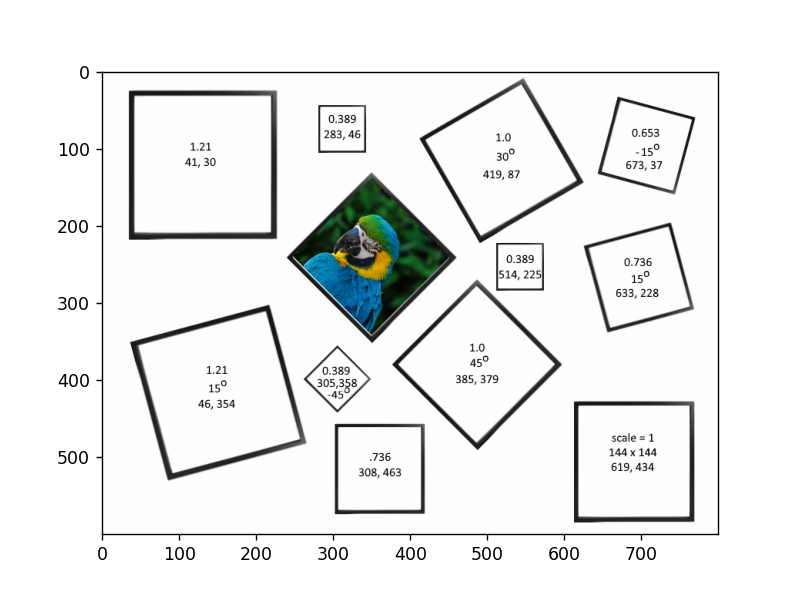

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib notebook

def compose(frame, image, transformation):
    
    width, height = frame.size
    
    #Invert matrix for compose function, grab values for Affine Transform
    t = np.linalg.inv(transformation)
    a=t[0,0]; b=t[0,1]; c=t[0,2]; d=t[1,0]; e=t[1,1]; f=t[1,2]
    
    image = image.transform((width,height), Image.AFFINE,(a,b,c,d,e,f), Image.BICUBIC)

    #Make mask from image's location
    im = np.sum(np.asarray(image), -1)
    vals = 255.0*( im > 0)
    mask = Image.fromarray(vals).convert("1")

    #Composite images together
    result = Image.composite(image,frame,mask)

    return result


#Open the two images
filename = "./img/03-Coordinate_transformation/PictureFrameCollage.png"
frame = Image.open(filename).convert("RGB")

filename0 = "./img/03-Coordinate_transformation/Bird0.png"
im = Image.open(filename0).convert("RGB")
theta_in_angle = -45
theta = np.deg2rad(theta_in_angle)

px = 350
py = 138
scale = 1
#Define the transformation to the first picture frame
# transformation = np.matrix([[np.cos(theta), np.sin(theta), scale*px],[-np.sin(theta), np.cos(theta), scale*py], [0,0,1]])
transformation = np.matrix([[scale*np.cos(theta),scale*np.sin(theta), px],
                            [scale*-np.sin(theta), scale*np.cos(theta), py],
                            [0,0,1]])
# transformation = np.matrix([[1,0,619],[0,1,433],[0,0,1]])


#Compose the two images together
result = compose(frame, im, transformation)
    
#Show the result
plt.imshow(result)
plt.show()

#Uncomment this line if you want to save the image
#result.save("Output.png")

### Example of transformation with scale
The image of a bird is placed at $(619,434)$,rotate the image to $(45,354,15^\circ)$ with a scale factor equals to 1.21.

<IPython.core.display.Javascript object>


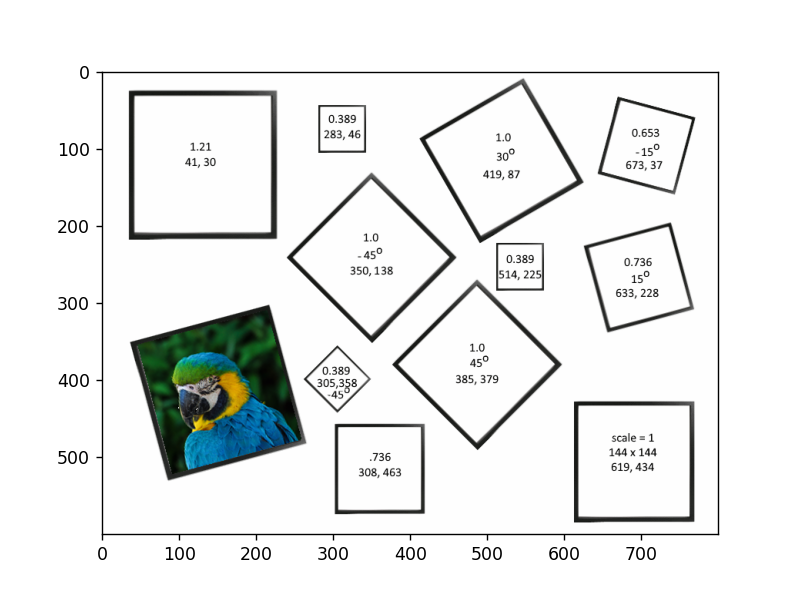

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib notebook

def compose(frame, image, transformation):
    
    width, height = frame.size
    
    #Invert matrix for compose function, grab values for Affine Transform
    t = np.linalg.inv(transformation)
    a=t[0,0]; b=t[0,1]; c=t[0,2]; d=t[1,0]; e=t[1,1]; f=t[1,2]
    
    image = image.transform((width,height), Image.AFFINE,(a,b,c,d,e,f), Image.BICUBIC)

    #Make mask from image's location
    im = np.sum(np.asarray(image), -1)
    vals = 255.0*( im > 0)
    mask = Image.fromarray(vals).convert("1")

    #Composite images together
    result = Image.composite(image,frame,mask)

    return result


#Open the two images
filename = "./img/03-Coordinate_transformation/PictureFrameCollage.png"
frame = Image.open(filename).convert("RGB")

filename0 = "./img/03-Coordinate_transformation/Bird0.png"
im = Image.open(filename0).convert("RGB")
theta_in_angle = 15
theta = np.deg2rad(theta_in_angle)

px = 46
py = 354
scale = 1.21
#Define the transformation to the first picture frame
# transformation = np.matrix([[np.cos(theta), np.sin(theta), scale*px],[-np.sin(theta), np.cos(theta), scale*py], [0,0,1]])
transformation = np.matrix([[scale*np.cos(theta),scale*np.sin(theta), px],
                            [scale*-np.sin(theta), scale*np.cos(theta), py],
                            [0,0,1]])
# transformation = np.matrix([[1,0,619],[0,1,433],[0,0,1]])


#Compose the two images together
result = compose(frame, im, transformation)
    
#Show the result
plt.imshow(result)
plt.show()

#Uncomment this line if you want to save the image
#result.save("Output.png")